![urhere](https://omega0.xyz/omega8008/.icons/urhere.gif)
# Bin Boxes
A Bin box, or *Binary* box, contains any number of tickes

but there are only two different labels on them.

The picture below shows a sample of $n$ draws at random

from a box with $r$ reds and $b$ blues. The draws could

be made with or without replacememt.

![rbbox](mybox.png)

We are often interested in counting the number of tickets of one kind

observed in the sample of $n$. For example, if we want to count

the number of reds, just assume that reds are ones (1) and blues are (0)

and $S_{n}= X_{1}+\ldots +X_{n}$, i.e. the sum of the draws becomes

the total number of reds in the sample.

## The Average and the SD in the Bin box
More generally if we label reds with number $R$ and blues with $B$

then the mean and the sd in the box are:
$$
\begin{align*}
\mbox{(ave. in box)} &= \frac{r \times R + b \times B}{r+b}\\
\mbox{(sd in box)} &= |R-B|\cdot \sqrt{\frac{r}{r+b}\cdot \frac{b}{r+b}}
\end{align*}
$$
The formula for the SD follows easily from the definition of SD.

Here is how it can be shown with sagemath with the help of [Sim](https://omega0.xyz/sim.sage)

the Simplificator.

In [13]:
%display latex
load("https://omega0.xyz/sim.sage")
_=var('R,B,r,b,mu,sigma')
assume(r>0,b>0)
assume(R,'real',B,'real')
mu = (r*R+b*B)/(r+b)
Var = (r*(R-mu)^2+b*(B-mu)^2)/(r+b)
Var

((B - (B*b + R*r)/(b + r))^2*b + (R - (B*b + R*r)/(b + r))^2*r)/(b + r)

In [8]:
Var=Sim(Var)
Var

(B - R)^2*b*r/(b + r)^2

In [9]:
sigma = sqrt(Var)
sigma

sqrt(b*r)*abs(B - R)/(b + r)

Let $p = r/(r+b)$ be the proportion of red tickets in the box.

Thus, $p$ is the probability that a ticket drawn at random from the 

Bin box is observed to be a RED ticket. The mean $\mu$ and the SD, $\sigma$, 

i.e., the expected value and SD of a draw made at random from the box are:

$$\begin{align*}
\mu &= p R + (1-p) B \\
\sigma &= |B-R| \sqrt{p(1-p)}
\end{align*}
$$

## Observed frequency $f$ vs. Unobserved probability $p$
Let $f=S_{n}/n$ when $R=1$ and $B=0$. In other words $f$ is the observed

proportion of REDs in the sample of $n$ draws. Let us assume that the draws

are made with replacement. It does not matter if the draws are made without replacement

provided the numbers of tickets in the box are much much larger than the number of draws.

i.e., $n << \min(r,b)$. In fact if $n$ is less than 1%, or so, of the $\min(r,b)$ 

it does not matter.

We have the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT) providing

probabilistic relations between $f$ and $p$. The LLN says that as the sample size increases

the observed $f$ approaches the unobserved $p$ IN PROBABILITY. On the other hand,

the CLT refines this approach by providing the assymptotic distribution of $f^{*}$

(i.e., $f$ in standard units). The distribution of $f^{*}$ approaches the bell curve.

The LLN and the CLT are obtained under the APRIORI assumption that the draws are from

the Bin box Bin(p). Clearly the direct probability:

$$
P( f | p,n) = \binom{n}{nf} p^{nf}(1-p)^{n(1-f)}
$$
is given by the Binomial probability formula. It is however the INVERSE probability,

$P(p|f,n)$ the one we are most interested in but this requires the APRIORI probability

of Bin(p), since by Bayes Theorem,

$$
P(p|f,n) = \frac{P(f|p,n)\cdot P(\mbox{Bin}(p))}{P(f|n)}
$$

$P(\mbox{Bin}(p))$ is the APRIORI probability that we are drawing tickets from

the Bin(p) box, i.e. a Binary box with a proportion $p$ of REDs.

The space of Bin boxes is the set $\{\mbox{Bin}(p) : 0<p<1 \}$ which is a "curve" 

indexed by the one dimensional parameter $p$. It was shown in the second half

of the twentieth century (by Shun-ichi Amari) that this curve is (1/4) of 

a circle of radius 2. In other words, geometrically Bin($p$) is faithfully

represented by the point $(x(p),y(p))$ on the plane with,

$$
\begin{align*}
x(p) &= 2 \cos(t(p)) \\
y(p) &= 2 \sin(t(p)) \\
t(p) &= \frac{\pi}{4}+\frac{1}{2}\arcsin(2p-1)
\end{align*}
$$

It is a Riemannian manifold with Fisher Information as the metric and it has an 

intrinsic normalized volume (length in this case) element given by:

$$
\mbox{vol}(dp) = \frac{dp}{\pi \sqrt{p(1-p)}}
$$

This is the objective uniform prior distribution on the curve of Bin($p$) boxes.

It is a Beta distribution with parameters $a=b=1/2$. The following sage cell shows 50

points on the circle of radius 2 when $p \sim \mbox{Beta}(1/2,1/2)$. Notice that the points

cover the positive part of the circle uniformly. However, when $p \sim \mbox{Bin}(1,1)$, i.e.

when $p\sim \mbox{Unif}(0,1)$, which was Laplace's choice for the ignorant prior, does not

cover the circle uniformly. It produces gaps close to the extremes $p=0$ and $p=1$.

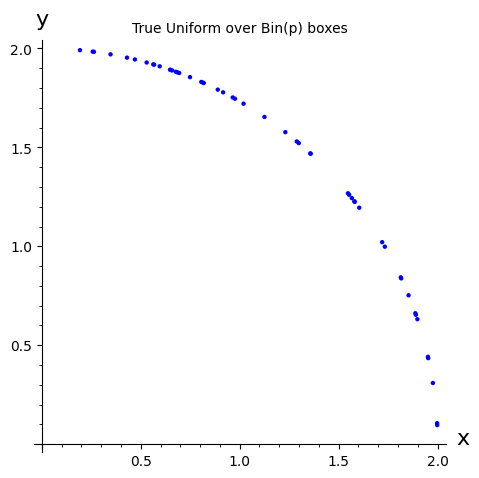

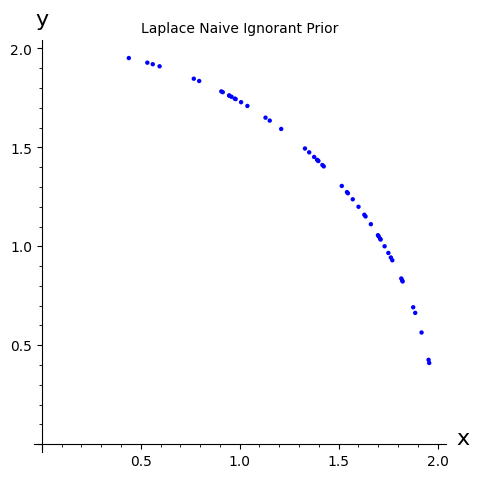

In [29]:
def t(p): return pi/4+arcsin(2*p-1)/2

def pnpts(ps): return point([(2*cos(t(ps[i])),2*sin(t(ps[i]))) for i in range(len(ps))])

def Ppts(n,a,b,title=""):
    T=RealDistribution('beta',[a,b])
    ps = [T.get_random_element() for i in range(n)]
    show(pnpts(ps),aspect_ratio=1,xmin=0,xmax=2,ymin=0,ymax=2,title=title,axes_labels=['x','y'])

# The True Uniform over the Bin(p) boxes:
Ppts(50,1/2,1/2,title="True Uniform over Bin(p) boxes")

# The Laplace choice:
Ppts(50,1,1,title="Laplace Naive Ignorant Prior")

In [10]:
# Checking the vol. element:
_=var('p')
assume(p>0,p<1)

def t(p): return pi/4+arcsin(2*p-1)/2
def x(p): return 2*cos(t(p))
def y(p): return 2*sin(t(p))

dx = diff(x(p),p)
dy = diff(y(p),p)
dl_square = Sim(dx^2 + dy^2)
dl = sqrt(dl_square)
vol = 1/sqrt(p*(1-p))

# Thus, this is the volume element:
Sim(dl - vol)

0

In [11]:
vol

1/sqrt(-(p - 1)*p)

Since, $0<p<1$ ranges over the continium $(0,1)$ interval $P(p|f,n)$ needs to be 

interpreted as a scalar probability density so that the chances of $p\in A$, for some

sub interval of $(0,1)$ are obtainable by integration,

$$
P( p\in A | f,n) = \int_{A} P(p|f,n)\cdot \mbox{vol}(dp)
$$

## For $n$ Large
Recall the famous Stirling approximation for $n!$,

$$
\log n! = (n+1/2)\log n - n + \log \sqrt{2\pi} + o(1)
$$

It follows that,

$$
\log \binom{n}{nf} = n H(f) - \frac{1}{2}\log(2\pi n f(1-f)) + o(1)
$$

where $H(f) = -f\log f - (1-f)\log(1-f)$ is the *entropy* of Bin(f), i.e.,

the expected amount of *information* or surprise provided by learning the result

of one draw from a Bin(f) box. Applying this result to the Binomial formula above

we obtain:

$$
\log P(f|p,n) = -n I(f:p) - \frac{1}{2}\log(2\pi n f(1-f)) + o(1)
$$

where now $I(f:p)$ is the Kullback number between Bin(f) and Bin(p) measuring the 

information separation between them. It is given by the formula:

$$
I(f:p) = f\log\frac{f}{p} + (1-f)\log\frac{1-f}{1-p}
$$

Thus, as $n\rightarrow \infty$

$$
P(f|p,n) = \sqrt{\frac{n}{2\pi f(1-f)}}\  \exp\left(-n I(f:p)\right)\  (1 + o(1))
$$

on the other hand, by the CLT $f \sim N(p, p(1-p)/n)$ approximately. Therefore,

$$
P(f|p,n) = \sqrt{\frac{n}{2\pi p(1-p)}}\ \exp -\frac{1}{2}\left( 
    \frac{f-p}{\sqrt{\frac{p(1-p)}{n}}}\right)^{2}\ (1 + o(1))
$$

If we let $N(f|p,\frac{p(1-p}{n})$ be the pdf of the gaussian (Normal) with mean $p$

and variance $p(1-p)/n$, then for $n$ large we have:

$$
\sqrt{\frac{n}{2}}\ e^{-n I(f:p)}\ \mbox{vol}(df) = N\left(f\left|p\right.,\frac{p(1-p)}{n}\right)\ df\ (1+o(1))
$$

This shows that $\exp -n I(f:p)$ should be regarded as a prior (unnormalized)

density on the space of Boxes with $n$ and $p$ as parameters for the prior.

The following plot shows that the approximation is better when $p$ is 

in the middle $p \approx 1/2$ than when $p$ is close to the extremes $0$ or $1$.

With only $n=8$ draws the two curves become close when $p=0.5$ but $n=30$ is needed

for a similar approximation when $p=0.75$.

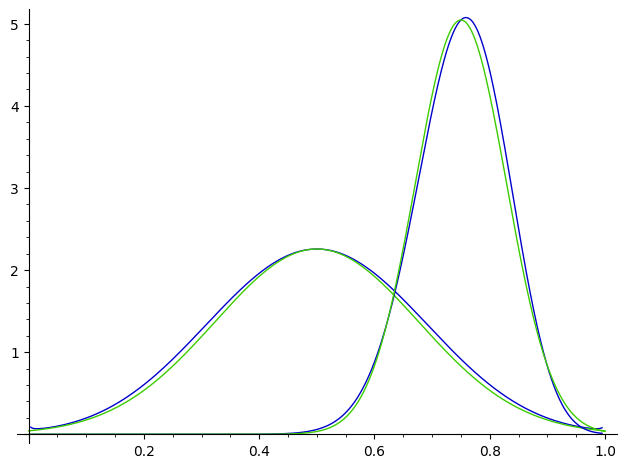

In [31]:
var('f,p,n')
assume(f>0,f<1,p>0,p<1,n,'integer',n>0)

def I(f,p): return f*log(f/p)+(1-f)*log((1-f)/(1-p))
def P1(f,p,n): return sqrt(n/(2*pi*f*(1-f)))*exp(-n*I(f,p))
def P2(f,p,n): return sqrt(n/(2*pi*p*(1-p)))*exp(-n*(f-p)^2/(2*p*(1-p)))

q=1/2
m=8
plt1 = plot([P1(f,q,m),P2(f,q,m)],f,0,1)

q=0.75
m=30
plt2 = plot([P1(f,q,m),P2(f,q,m)],f,0,1)

show(plt1+plt2)

## Information Volume from Cross Entropy
Here is an easy way to get the volume element in $\{\mbox{Bin}(p): 0<p<1\}$.

Compute $I(f:p)$ for an $f$ deviating just a little $\epsilon$ from $p$.

Then,
$$
\mbox{vol}(p) = \sqrt{ \lim_{\epsilon \rightarrow 0^{+}} \frac{2 I(p+\epsilon : p)}{\epsilon^{2}}}
$$


In [20]:
_=var('epsilon')
vol(p) = sqrt( Sim(limit(2*I(p+epsilon,p)/epsilon^2,epsilon=0)) )
vol(p)


sqrt(-1/(p^2 - p))

In [21]:
Sim(vol(p) - 1/sqrt(p*(1-p)))

0

This way of computing the volume element works not just for the simple

one dimensional space of Binary Boxes $\{\mbox{Bin}(p)\}$ but for any

collection of boxes $\{\mbox{Box}(\theta)\}$ that can be smoothly labeled 

with a finite number of parameters
$\theta=(\theta^{1},\theta^{2},\ldots,\theta^{m})$. The information separation

between $\mbox{Box}(\mu)$, for some $\mu=(\mu^{1},\ldots,\mu^{m})$, and $\mbox{Box}(\theta)$ is,

$$ I(\mu : \theta) = \int dx\, p(x|\mu)\cdot\log \frac{p(x|\mu)}{p(x|\theta)} $$

where the integral sums over all the different numbers $x$, in $\mbox{Box}(\mu)$.

Depending on the boxes containing a continium or a discrete number of tickets,

$p(x|\theta)$ denotes the probability mass or the probability density function

w.r.t. a volume element $dx$. In any case we can compute the info separation with

the formula above: average the logarithm of the ratio of probabilities $p(x|\mu)/p(x|\theta)$,

when $x$ runs inside $\mbox{Box}(\mu)$. This number is never negative and it is zero

only when $\mbox{Box}(\theta) = \mbox{Box}(\mu)$ (as boxes, i.e. only the proportions

of the different $x$ values not how many there are matters). 

If there is a ticket with the number $x$ in $\mbox{Box}(\mu)$, but there is no such $x$

in $\mbox{Box}(\theta)$, then $I(\mu:\theta) = \infty$. For example,

$I(\mbox{Unif}(0,1):\mbox{Unif}(-1,1)) = \log 2$, but 
$I(\mbox{Unif}(-1,1):\mbox{Unif}(0,1)) = \infty$.

Just look at the following picture:

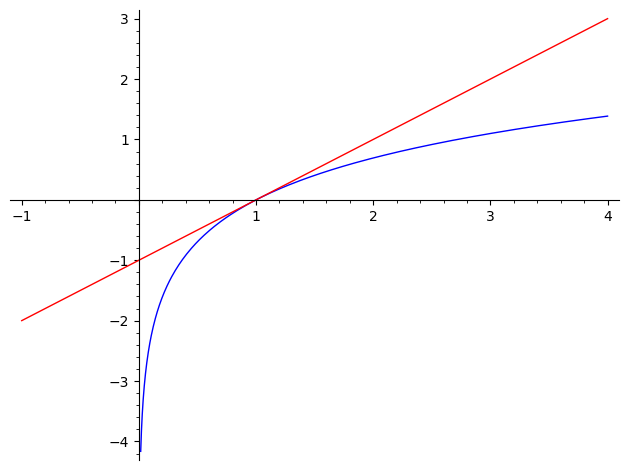

In [28]:
plog = plot(log(x),x,0,4,color='blue')
p1x = plot(x-1,x,-1,4,color='red')
show(plog+p1x)

The blue line is $y=\log x$, the red line is $y=x-1$ touching the $\log$

tangentially at $x=1$. Thus, the inequality $\log x \le x-1$, with

equality, only when $x=1$. Multiplying both sides of the inequality by

$(-1)$ reverses the inequality to: $\log \frac{1}{x} \ge 1-x$ for all $x > 0$.

Hence:

$$
\begin{align*}
\log \frac{p(x|\mu)}{p(x|\theta)} &\ge 1 - \frac{p(x|\theta)}{p(x|\mu)} \\
\ & \\
\mbox{ and averaging over } x\in \mbox{Box}(\mu) & \\
\ & \\
I(\mu : \theta) &\ge 1 - 1 = 0
\end{align*}
$$

with equality, when, and only when, $\mbox{Box}(\mu)=\mbox{Box}(\theta)$ as Boxes.

Now, same game as before with $\{\mbox{Bin}(p)\}$, just compute the information

separation of $\mbox{Box}(\theta + t\cdot v)$ from $\mbox{Box}(\theta)$ for small values

$t>0$ and another (velocity) vector $v=(v^{1},\ldots,v^{m})$ indicating the direction 

of change from $\mbox{Box}(\theta)$. The function,

$h(t) = I(\theta + t v : \theta)$ as a function of $t$, is never negative and at 

$t=0$ has a global minimum of zero. In other words, $h(0)=h^{'}(0)=0$ and $h^{''}(0) > 0.$

The Taylor expansion of $h(t)$ about $0$ up to second order is,

$$
\begin{align*}
h(t) &= h(0) + h^{'}(0) t + h^{''}(0) \frac{t^{2}}{2!} + o(t^2) \\
 &= \frac{a^{2}}{2} t^{2} + o(t^{2})
\end{align*}
$$

the positive number $a^{2}$ is called the Fisher Information evaluated at $v$ and

it defines the Information metric $a^{2} = \sum_{i,j} v^{i} g_{ij}(\theta) v^{j}$

where from the definition of $I(\mu:\theta)$ and the chain rule of Calc3, it follows

$$
\begin{align*}
g_{ij}(\theta) &= \int \frac{1}{p(x|\theta)}\frac{\partial{p(x|\theta)}}{\partial\theta^{i}}
                        \frac{\partial{p(x|\theta)}}{\partial\theta^{j}}\, dx \\
     \\                   
 &= \int dx\ {p(x|\theta)}\ \frac{\partial{\log p(x|\theta)}}{\partial\theta^{i}}
            \frac{\partial{\log p(x|\theta)}}{\partial\theta^{j}} \\
   \\         
 &= - \int dx\ p(x|\theta)) \frac{\partial^{2}}{\partial\theta^{i}\partial\theta^{j}} \log p(x|\theta) \\
 \\
 &= \int dx\ \frac{\partial\left( 2\sqrt{p(x|\theta)}\right)}{\partial\theta^{i}}\ 
    \frac{\partial\left(2 \sqrt{p(x|\theta)}\right)}{\partial\theta^{j}}
\end{align*}
$$

giving 4 different (but equivalent) expressions for the entries of the Fisher information 

matrix at $\mbox{Box}(\theta)$. Notice the vector embedding $p \hookrightarrow 2\sqrt{p}$ in the

last expression for the metric $g_{ij}(\theta)$ above. 

Finally, the volume element in the space is the square root 

of the determinant of Fisher Information,

i.e., $\mbox{vol}(d\theta) = \sqrt{\det (g_{ij}(\theta))}\ d\theta$. When the total information volume $V = \int \mbox{vol}(d\theta) < \infty$

there exists a notion of equally likely uniform prior on the space provided by its volume element.

When $V=\infty$, the family $\{ e^{-\alpha I(\theta:\theta_{0})}: \alpha > 0\}$ of prior distributions

provided by their density functions w.r.t. the volume element, are some of the most ignorant [(honest)](https://omega0.xyz/omega8008/dataprior/dp4arxiv.pdf).

objective priors in any number of dimensions!

## Rules of Succession
For any $0<p<1$, it is always possible to observe all the $n$ draws from 

$\mbox{Bin}(p)$ to be of only one kind, i.e. to observe $f=0$ or $f=1$.

If after drawing $n$ tickets with replacement from a Bin box we observe all the $n$ tickets

to be red, what does that tell us about the *unknown* probability of red in the Bin

box? What's the probability of red for the next $X_{n+1}$ draw?

If we knew that the box is $\mbox{Bin}(p)$, for a given known value of $p$, then

by the assumption of the draws done with replacement, the different draws are *logically*

*independent* and cannot tell us anything about $X_{n+1}$. But WE NEVER KNOW $p$!

Probabilities, this $p$ or any other $p$ for that matter, are UNOBSERVABLE.

It is remarkable that the information geometry introduced above does allow to 

compute the probability: $P(X_{n+1}=1 | f,n)$.

All that is needed is the prior $P(\mbox{Bin}(p))$, an without extra assumptions,

i.e. in the state of total ignorance beyond Box in $\{\mbox{Bin}(p): 0<p<1\}$ 

the *true* uniform in the space of boxes is our only logical choice for the prior.

For any $0\le f \le 1$,

$$
\begin{align*}
P(X_{n+1} = 1 | f,n) &= \int_{0}^{1} P(X_{n+1}=1 | \mbox{Bin}(p))\ P(\mbox{Bin}(p) | f,n)\ 
    \mbox{vol}(dp) \\
    \\
 &= \int_{0}^{1} p\ \frac{P(f | \mbox{Bin}(p),n) \cdot 1 \cdot \mbox{vol}(dp)}{P(f|n)} \\
 \\
 &= \frac{\int_{0}^{1} p \binom{n}{nf} p^{nf}(1-p)^{n(1-f)}\ \mbox{vol}(dp)}
         {\int_{0}^{1} \binom{n}{nf} p^{nf}(1-p)^{n(1-f)}\ \mbox{vol}(dp)} \\
         \\
 &= \frac{B(nf+1/2+1,n(1-f)+1/2)}{B(nf+1/2,n(1-f)+1/2)}\\
 \\
 &= \frac{nf+1/2}{n+1}
\end{align*}
$$

where $B(\alpha,\beta) = \Gamma(\alpha)\Gamma(\beta)/\Gamma(\alpha+\beta)$ is the Beta

function, defined for $\alpha>0$ and $\beta > 0$ in terms of the Gamma function,

$$
\Gamma(\alpha) = \int_{0}^{\infty} x^{\alpha-1} e^{-x}\, dx
$$

that interpolates the factorials since $\alpha \Gamma(\alpha) = \Gamma(\alpha+1)$. When $f=1$,

$$
P(X_{n+1}=1 | f=1,n) = \frac{n+1/2}{n+1}
$$

| n    | Laplace | vol   |
| ---- | ------- | ----- |
| 0    | 0.5     | 0.5   |
| 1    | 0.62    | 0.75  |
| 2    | 0.75    | 0.88  |

